In [1]:
using Interact, Plots, DifferentialEquations, BifurcationKit, Setfield, IntervalRootFinding, ForwardDiff
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

# Ecuacion del consumidor

El siguiente modelo poblacional es un poco más realista y se conoce como ecuación del consumidor. Es un modelo que aparece en macroeconomia como una simplificación de la dinámica del consumo de un recurso renovable y  no es mas que la ecuacion logistica con un termino de cosecha o consumo que es directamente proporcional a la abundancia del recurso $Px$. El parámetro $P$ corresponde a la tasa de consumo del recurso y $R$ se puede reinterpretar como la tasa de producción o de generación del recurso renovable.  

$ \dot{x} = Rx\left(1-\frac{x}{K}\right) - Px$ 


Notar que como no hay problema de divergencia para $x>0$ ya no necesitamos el callback.

In [2]:
# Ecuacion del consumidor
consumer(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x

consumer (generic function with 1 method)

In [3]:
@manipulate throttle=.05 for R=0:0.02:1.0,K=0.01:0.01:2.0,P=0:0.02:0.5,x0=0:0.02:2.0,tmax=1.0:5.0:200.0
    flux1D(consumer,x0,tmax,[R,K,P];xlims=[-1.0,2.0],title="Ec. del Consumidor")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
26, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000a4c71b30, Task (runnable) @0x00000000a4c71b30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",\

En este caso los puntos fijos son siempre dos y no se produce una bifurcación de nodo silla. Si se fija la tasa de producción $R$ en un valor no demasiado grande y se va incrementando la tasa de consumo $P$ desde cero se observa que al  principio las trayectorias tienden a un punto fijo cercano a $K$ (como en el modelo logístico). A medida que la tasa de consumo se acerca a la de producción el punto fijo se va corriendo hacia la izquierda pero el otro punto fijo que esta en el origen (que es un repulsor como en el modelo logístico) no se modifica.

Evaluando $f(x)=0$ podemos deeterminar las coordenadas de los puntos fijos. 

Un punto fijo esta siempre en $x_*=0$ que es un repulsor para valores de $P$ pequeños.

El otro se mueve con los parámetros y se encuentra en 

$x_* = \displaystyle\frac{K(R-P)}{R}$

que como habiamos mencionado si partimos de $P=0$ es un atractor y a medida que $P$ se incrementa se va corriendo hacia la izquierda. Lo interesante es que cuando la tasa de consumo iguala a la de producción $P=R$ este atractor llega a cero, coalesce con el otro punto fijo repulsor pero no se produce una bifurcacion SN porque para $P>R$ pasa del lado de los negativos (no se aniquila y pasa "a traves" del punto fijo del origen). 

Si evaluamos graficamente las derivadas (pendientes) en esos puntos vamos a ver que luego de cruzar para los valores de $x$ negativos este punto fijo movil pasa a ser un repulsor y el punto fijo del origen se transforma en atractor. Es decir que en el punto en el que coalescen intercambian estabilidad. Esto corresponde a una bifurcación de un nuevo tipo que se conoce como **bifurcación transcrítica**.

Veamos esto mismo a partir de la linealizacion. La derivada del campo vector es $f'(x)=R-P-2Rx^2/K$. Evaluamos la estabilidad en cada uno de los puntos fijos:

- Para el punto fijo en el origen $x_*=0$ la derivada es $f'(0)=R-P$ con lo cual se trata de un repulsor para $P<R$ y 
de un atractor para $P>R$. Cuando $P=R$ de produce la bifurcación (el cambio de estabilidad en el punto fijo).
- Para el punto fijo $x_*=K(R-P)/R$ la derivada es $f'(K(R-P)/R)=P-R$ que es justo el caso inverso del anterior por lo tanto se trata de un atractor para $P>R$ y de un repulsor para $P>R$. Cuando $P=R$ de produce la bifurcación y el intercambio de estabilidad con el otro punto fijo.

Los puntos fijos cambian de estabilidad de forma simultánea y en la dirección opuesta, de ahí la idea del intercambio de estabilidad y el nombre de transcrítica.

Cuando estudiamos la bifurcacion de nodo silla dijimos que era generica y que no habia forma general de cambiar la estabilidad de un punto fijo sin producir una aniquilación con un par complementario. Que es lo que sucede ahora que puede cambiar la estabilidad de dos puntos fijos sin que se aniquilen entre si? Lo que sucede es que estamos forzando a que $x=0$ sea siempre un punto fijo y eso no es generico. De hecho si perturbamos cualquier sistema que tenga una bifurcacion transcritica pueden pasar dos cosas: o que la bifucacion desaparezca o que se transforme en dos SN.


## Diagrama de Bifurcaciones Consumidor. Bifurcacion Transcritica

Vamos a usar el paquete BifurcationKit para calcular el diagrama de bifurcaciones. 

El primer paso es como antes redefinir nuestro campo vector como funcion solo de $x$ y $p$. Luego vamos a calcular dos ramas, la primera (br1) dandole un guess inicial para el punto fijo en un valor positivo y la segunda (br2) con el guess en 0. Si bien muestra dos puntos de bifurcacion se trata del mismo en $P=0.2$.

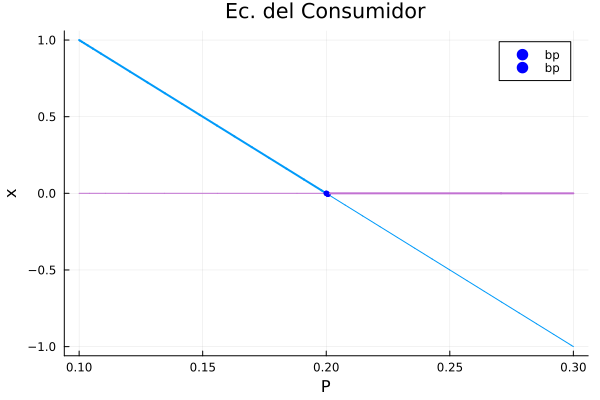

In [4]:
F=(x,p) -> @. consumer(x,(p,),0)
R=0.2; K=2.0; Pmin=0.1; Pmax=0.3
opts = ContinuationPar(pMin=Pmin,pMax=Pmax, ds = 0.003, dsmax = 0.05, detectBifurcation=3)
br1, = continuation(F,[0.8],[R,K,Pmin],(@lens _[3]), opts; recordFromSolution = (x, p) -> x[1])
br2, = continuation(F,[-0.2],[R,K,Pmin],(@lens _[3]), opts)
plot(br1,title="Ec. del Consumidor")
plot!(br2,xlabel="P")

# Calculo numerico de los puntos fijos y su estabilidad

Si bien en este ultimo caso es sencillo calcular los puntos fijos y la estabilidad de forma analítica, vamos a ver una forma de calcular ambas cosas para casos genéricos (fuera de la bifurcacion) usando la función **roots** del paquete IntervalRootFinding y la funcion **derivative** de ForwardDiff.

La unica restriccion es que tenemos que redefinir nuestro campo vector para un valor particular de parametros que es lo que hacemos en la primer linea. Luego simplemente aplicamos roots


In [5]:
R=0.2; K=2.0; P=0.1;
c(x) = consumer(x,[R,K,P],0)
pf = roots(c,-10..20)

2-element Vector{Root{Interval{Float64}}}:
 Root([0.999999, 1.00001], :unique)
 Root([-8.23357e-15, 7.51891e-15], :unique)

La funcion roots no devuelve valores sino intervalos donde puede haber un cero, que es unico si tiene el simbolo unique o no si dice unknown. Podemos tomar el valor medio del intervalo con mid y hacer un array con los ceros definiendo un array de forma implicita de la siguiente forma

In [6]:
xstar = [mid(p.interval) for p in pf]

2-element Vector{Float64}:
  1.0000000000034677
 -3.57329810473983e-16

Luego, podemos calcular el valor de la derivada en estos puntos aplicando la funcion derivative con broadcasting

In [7]:
pd = derivative.(c,xstar)

2-element Vector{Float64}:
 -0.10000000000069353
  0.10000000000000009

Finalmente, podemos incorporar los puntos fijos en un grafico interactivo que sume las dos ramas del diagrama de bifurcaciones

In [8]:
K = 2.0; R=0.2
@manipulate throttle=.1 for H=0.1:0.005:0.3
    c(x) = consumer(x,[R,K,H],0)
    xstar = [mid(p.interval) for p in roots(c,-1..2)]
    plot(br1,title="Ec. del Consumidor")
    plot!(br2,xlabel="P")
    scatter!(repeat([H],length(xstar)),xstar,label="PF")
end 

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["H"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 41, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
21, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000092a75560, Task (runnable) @0x0000000092a75560), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.105\",\"0.11\",\"0.115\",\"0.12\",\"0.125\",\"0.13\",\"0.135\",\"0.14\",\"0.145\",\"0.15\",\"0.155\",\"0.16\",\"0.165\",\"0.17\",\"0.175\",\"0.18\",\"0.185\",\"0.19\",\"0.195\",\"0.2\",\"0.205\",\"0.2

## Forma normal de la Bifurcación Transcrítica

Como para el caso de la SN podemos escribir la ecuación diferencial "minimal" que presenta una bifurcación transcrítica (TC) en el origen para el valor de parámetro cero. Esta es:

$\dot{x}=ax-x^2$

Cual va a ser la interpretación geométrica de la TC en términos de los cambios en los ceros y las derivadas de los ceros de $f(x)$? Si la SN correspondia a una parabola que cortaba el eje horizontal en un punto cualquiera, en este caso es una parábola que está "anclada" al origen porque no tiene término constante y $x_*=0$ es siempre un punto fijo. Esto hace que al cambiar el signo de $a$ el extremo de la parábola pase de los positivos a los negativos a través del origen. Podemos graficar $f(x)$ antes en y después de la bifurcación.

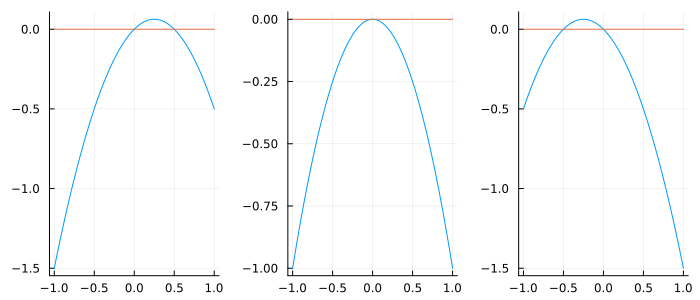

In [9]:
tc(x,a)=x*(a-x)
x = -1.0:0.01:1.0
p1 = plot(x,tc.(x,0.5)); plot!(p1,[-1,1],[0,0],legend=false)
p2 = plot(x,tc.(x,0)); plot!(p2,[-1,1],[0,0],legend=false)
p3 = plot(x,tc.(x,-0.5)); plot!(p3,[-1,1],[0,0],legend=false)
plot(p1,p2,p3,layout=(1,3),size=(700,300))

## Potencial de Ecuacion del Consumidor

Al potencial de la logistica se le agrega ahora un término cuadratico $Px^2$ que hace que el potencial tenga siempre una barrera a la izquierda y un pozo a la derecha, solo que en la bifurcacion ambos se encuentran

$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right) + Px^2$

In [10]:
Vconsumer(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*x*x/2
R = 0.2; K=2.0
@manipulate throttle=.05 for P=0.15:0.001:0.25,x0=0:0.01:0.6,tmax=10.0:10.0:200.0
    xmax = max(1.2*x0,0.6)
    potential1D(Vconsumer,x0,tmax,[R,K,P];xlims=[-0.3,xmax],title="Ec. del Consumidor")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["P"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008e755d20, Task (runnable) @0x000000008e755d20), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.15\",\"0.151\",\"0.152\",\"0.153\",\"0.154\",\"0.155\",\"0.156\",\"0.157\",\"0.158\",\"0.159\",\"0.16\",\"0.161\",\"0.162\",\"0.163\",\"0.164\",\"0.165\",\"0.166\",\"0.167\",\"0.168\",\"0.169\",\"0.17\",\"0.

# Ecuacion Logistica con Harvest mas realista

Otra forma de hacer depender el Harvest de la poblacion pero mas realista es usar en lugar de una funcion lineal una funcion que sature ya que la capacidad de extraccion tambien es limitada. En este modelo el harvest depende de la poblacion (o la abundancia del recurso) como $x/(1+x)$. Si bien en este caso nos apartamos de las funciones polinómicas que habiamos usado hasta ahora, esta es una de las funciones mas simples para tener una saturacion.

$ \dot{x} = Rx\left(1-\displaystyle\frac{x}{K}\right) - H\displaystyle\frac{x}{1+x}$ 

Como en el caso anterior, este sistema va a tener siempre un punto fijo en $x=0$. Puede tener otros dos como solucion de la ecuacion cuadratica:

$x^2-(K-1)x+KH/R-K=0$

Estos puntos fijos van a ser uno estable y otro inestable (se originan en una bifurcacion SN) pero solo van a estar en el eje positivo cuando $K>1$. Notar que como no hay problema de divergencia para $x>0$ ya no necesitamos el callback.

In [11]:
# Ecuacion Logistica con harvest realista
logharvest2(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x/(1+x)

logharvest2 (generic function with 1 method)

In [12]:
@manipulate throttle=.05 for R=0:0.02:1.0,K=0:0.01:2.0,H=0:0.01:0.5,x0=0:0.02:2.0,tmax=1.0:5.0:50.0
    flux1D(logharvest2,x0,tmax,[R,K,H];xlims=[-0.2,0.5],title="Log con Harvest 2")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
26, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000a79ab650, Task (runnable) @0x00000000a79ab650), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",\

## Diagrama de bifurcaciones Logistica con Harvest Realista. Nodo Silla + Transcritica

En este caso tambien tenemos una bifurcacion de nodo silla pero en los dos puntos fijos que no son cero.

Estos puntos fijos pueden calcularse a partir de la ecuacion cuadratica como 

$x_* = \frac{K-1}{2} \pm \sqrt{\left(\frac{K-1}{2}\right)^2-\frac{KH}{R}+K}$

y van a colapsar cuando la raiz cuadrada sea cero es decir cuando 

$H = \frac{R}{K}\left(\frac{K-1}{2}\right)^2 + R$

Para valores de $H$ mayores 

La bifurcacion SN se produce para ese valor de $H$ y en la coordenada $x=(K-1)/2$

Es esta la unica bifurcacion? Podemos evaluar la estabilidad del punto fijo mas fácil que es el que siempre está en cero. La derivada del campo vector es:

$f'(x) = R - \frac{2R}{K}x - \frac{H}{(1+x)^2}$

que evaluada en cero es $f'(0)=R-H$. 

Es decir que cuando $H=R$ ese punto fijo intercambia estabilidad con la rama inestable de la SN y tenemos una bifurcacion transcritica (TC). Puede verse que el valor de $H$ para el que se produce la SN es siempre mayor que el de la TC porque se le suma un termino que es siempre positivo y porque el punto SN emite las ramas haca los valores de $H$ menores. 

Finalmente si $K>1$ tenemos la SN en los valores de $x$ positivos con la rama estable yendo hacia arriba, mientras que si $K<1$ la SN se produce a valores de $x$ negativo y la rama estable va hacia abajo (valores de $x$ negativos). Siempre es la rama inestable de la SN la que cruza el 0 e intercambia estabilidad. 

Como lo que tiene sentido en el modelo son los valores de $x$ positivos los casos $K>1$ y $K<1$ corresponden a dos tipos de cambios de comportamiento a medida que se incrementa $H$ diferentes. En el primer caso la aumentar el $H$ si estamos en el punto fijo estable la publacion decrece abruptamente cuando se encuentra la SN, mientras que en el segundo va descendiendo suavemente hasta llegar a cero en la TC.

Que sucede si $K=1$?

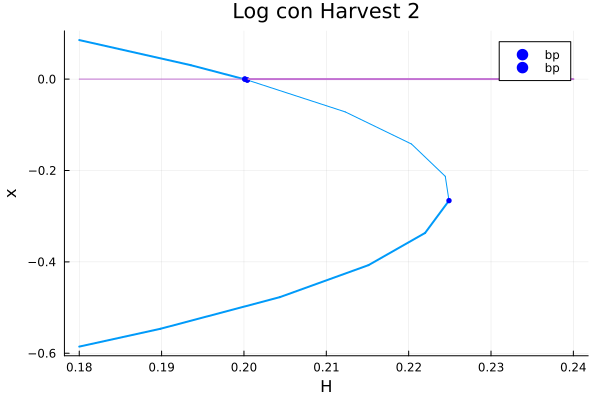

In [13]:
F=(x,p) -> @. logharvest2(x,(p,),0)
opts = ContinuationPar(pMin=0.18,pMax=0.24, ds = 0.04, dsmax = 0.05,detectBifurcation=3)
br1, = continuation(F,[1.0],[0.2,0.5,0.18],(@lens _[3]), opts; recordFromSolution = (x, p) -> x[1])
br2, = continuation(F,[-0.1],[0.2,0.5,0.18],(@lens _[3]), opts)
plot(br1,title="Log con Harvest 2")
plot!(br2,xlabel="H")

## Potencial de la Ecuacion Logistica con Harvest Realista

Ahora el termino que se le agrega al potencial de la logistica es la antiderivada (o integral indefinida) de $Hx/(1+x)$ que se puede buscar en Wolfram u otro sitio y es igual a $ H\left(x+log(1+x)\right)$.


$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right) + H\left(x+log(1+x)\right)$

In [14]:
Vlogharvest2(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*(x-log(1+x))
R = 0.2; K=2.0
@manipulate throttle=.05 for H=0.18:0.001:0.24,x0=0:0.01:1.2, tmax=10.0:10.0:200.0
    potential1D(Vlogharvest2,x0,tmax,[R,K,H];xlims=[-0.3,1.2],title="Log con Harvest 2")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["H"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 61, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
31, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000088dd89c0, Task (runnable) @0x0000000088dd89c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.18\",\"0.181\",\"0.182\",\"0.183\",\"0.184\",\"0.185\",\"0.186\",\"0.187\",\"0.188\",\"0.189\",\"0.19\",\"0.191\",\"0.192\",\"0.193\",\"0.194\",\"0.195\",\"0.196\",\"0.197\",\"0.198\",\"0.199\",\"0.2\",\"0.20

# Ecuacion Logistica con OutBreak

Este ultimo modelo incorpora un termino de "predación" de la especie que tiene una forma tipo sigmoidea. La diferencia con el anterior es que cuando la población era baja el modelo anterior se comportaba como la ecuación del consumidor (con harvest lineal) mientras que en este el término de harvest (o predación en este caso) es cuadrático (crece más lentamente al principio).

$\dot{x} = Rx\left(1-\displaystyle\frac{x}{K}\right)-P\displaystyle\frac{x^2}{1+x^2}$

En este caso no basta una cuadratica para calcular los puntos fijos. Pero $x=0$ sigue siendo un punto fijo repulsor. Y bajo ciertas condiciones tenemos dos puntos fijos atractores separados por un repulsor.

In [15]:
# Ecuacion Logistica con Outbreak
logoutbreak(x,p,t)=p[1]*x*(1.0-x/p[2])-p[3]*x*x/(1+x*x)

logoutbreak (generic function with 1 method)

In [16]:
@manipulate throttle=.05 for R=0:0.02:2.0,K=0:0.1:10.0,P=0:0.01:2.0,x0=0:0.05:8.0,tmax=10.0:5.0:100.0
    flux1D(logoutbreak,x0,tmax,[R,K,P];xlims=[-0.2,8.0],title="Log con Outbreak")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["R"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000082e07270, Task (runnable) @0x0000000082e07270), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.02\",\"0.04\",\"0.06\",\"0.08\",\"0.1\",\"0.12\",\"0.14\",\"0.16\",\"0.18\",\"0.2\",\"0.22\",\"0.24\",\"0.26\",\"0.28\",\"0.3\",\"0.32\",\"0.34\",\"0.36\",\"0.38\",\"0.4\",\"0.42\",\"0.44\",\"0.46\",

## Diagrama de bifurcaciones Logistica con Outbreak. Doble Nodo Silla

En este caso tenemos dos bifurcaciones SN que ocurren en direcciones opuestas 

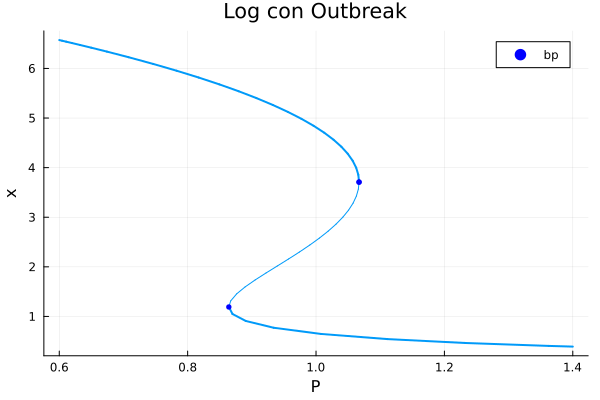

In [17]:
F=(x,p) -> @. logoutbreak(x,(p,),0)
opts = ContinuationPar(pMin=0.6,pMax=1.4, detectBifurcation=3)
br1, = continuation(F,[6.5],[0.5,8.0,0.6],(@lens _[3]), opts)
plot(br1,xlabel="P",title="Log con Outbreak")

Incorporamos ahora los puntos fijos calculados numericamente al diagrama de bifurcaciones.

In [18]:
K = 8.0; R=0.5
@manipulate throttle=.1 for P=0.6:0.005:1.2
    l(x) = logoutbreak(x,[R,K,P],0)
    xstar = [mid(p.interval) for p in roots(l,0..8)]
    plot(br1)
    scatter!(repeat([P],length(xstar)),xstar,label="PF",title="Log con Outbreak")
end 

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["P"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 121, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
61, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000008e755560, Task (runnable) @0x000000008e755560), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.6\",\"0.605\",\"0.61\",\"0.615\",\"0.62\",\"0.625\",\"0.63\",\"0.635\",\"0.64\",\"0.645\",\"0.65\",\"0.655\",\"0.66\",\"0.665\",\"0.67\",\"0.675\",\"0.68\",\"0.685\",\"0.69\",\"0.695\",\"0.7\",\"0.705\",\"0.

## Potencial de la Ecuacion Logistica con Outbreak

Ahora el termino que se le agrega al potencial de la logistica es la antiderivada (o integral indefinida) de $Px^2/(1+x^2)$ que es igual a $P\left(x-atan(x)\right)$.


$V(x) = \frac{Rx^2}{3K}\left(x- \frac{3K}{2}\right) + P\left(x-atan(x)\right)$

In [19]:
Vlogoutbreak(x,p) = p[1]*x*x/(3*p[2])*(x-3*p[2]/2)+p[3]*(x-atan(x))
R = 0.5; K=8.0
@manipulate throttle=.05 for P=0.8:0.001:1.2,x0=0:0.01:6.0, tmax=10.0:10.0:200.0
    potential1D(Vlogoutbreak,x0,tmax,[R,K,P];xlims=[0.0,6.0],title="Log con Outbreak")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["P"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 401, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
201, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000082dff270, Task (runnable) @0x0000000082dff270), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.8\",\"0.801\",\"0.802\",\"0.803\",\"0.804\",\"0.805\",\"0.806\",\"0.807\",\"0.808\",\"0.809\",\"0.81\",\"0.811\",\"0.812\",\"0.813\",\"0.814\",\"0.815\",\"0.816\",\"0.817\",\"0.818\",\"0.819\",\"0.82\",\"0.